# Pulsar Analysis-Group Proposal

### Load Library

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
library(ggplot2)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

### Read Data from Web

In [2]:
url <- "https://github.com/arielpark821/DSCI-100-Group-3/raw/main/HTRU_2.csv"
download.file(url, "pulsar_data.csv")
pulsar_data <- read_csv("pulsar_data.csv", col_names = FALSE)
slice(pulsar_data, 1:5)

Rows: 17898 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): X1, X2, X3, X4, X5, X6, X7, X8, X9

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


X1,X2,X3,X4,X5,X6,X7,X8,X9
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
140.56250,55.68378,-0.23457141,-0.6996484,3.199833,19.11043,7.975532,74.24222,0
102.50781,58.88243,0.46531815,-0.5150879,1.677258,14.86015,10.576487,127.39358,0
103.01562,39.34165,0.32332837,1.0511644,3.121237,21.74467,7.735822,63.17191,0
136.75000,57.17845,-0.06841464,-0.6362384,3.642977,20.95928,6.896499,53.59366,0
88.72656,40.67223,0.60086608,1.1234917,1.178930,11.46872,14.269573,252.56731,0


### Rename Columns according to website

In [3]:
pulsar_data <- rename(pulsar_data,
                      Mean_integrated = X1, 
                      Std_integrated = X2, 
                      Excess_kurtosis_integrated = X3, 
                      Skewness_integrated = X4,
                      Mean_curve = X5,
                      Std_curve = X6,
                      Excess_kurtosis_curve = X7,
                      Skewness_curve = X8,
                      Class = X9)
pulsar_data

Mean_integrated,Std_integrated,Excess_kurtosis_integrated,Skewness_integrated,Mean_curve,Std_curve,Excess_kurtosis_curve,Skewness_curve,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
140.5625,55.68378,-0.2345714,-0.6996484,3.199833,19.11043,7.975532,74.24222,0
102.5078,58.88243,0.4653182,-0.5150879,1.677258,14.86015,10.576487,127.39358,0
103.0156,39.34165,0.3233284,1.0511644,3.121237,21.74467,7.735822,63.17191,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
119.3359,59.93594,0.1593631,-0.74302540,21.430602,58.87200,2.499517,4.595173,0
114.5078,53.90240,0.2011614,-0.02478884,1.946488,13.38173,10.007967,134.238910,0
57.0625,85.79734,1.4063910,0.08951971,188.306020,64.71256,-1.597527,1.429475,0


### Change Class from 0/1 to Yes/No

In [4]:
pulsar_data <- pulsar_data |>
  mutate(Class = as_factor(Class)) |>
  mutate(Class = ifelse(Class == 1, "Yes", "No")) |>
  select(Mean_integrated, Std_integrated, Mean_curve, Std_curve, Class)
pulsar_data

Mean_integrated,Std_integrated,Mean_curve,Std_curve,Class
<dbl>,<dbl>,<dbl>,<dbl>,<chr>
140.5625,55.68378,3.199833,19.11043,No
102.5078,58.88243,1.677258,14.86015,No
103.0156,39.34165,3.121237,21.74467,No
⋮,⋮,⋮,⋮,⋮
119.3359,59.93594,21.430602,58.87200,No
114.5078,53.90240,1.946488,13.38173,No
57.0625,85.79734,188.306020,64.71256,No


### Split Data into training and test dataset (Proportion 75%)

In [5]:
pulsar_split <- initial_split(pulsar_data, prop = 0.75, strata = Class)
pulsar_train <- training(pulsar_split)
pulsar_test <- testing(pulsar_split)
glimpse(pulsar_train)
glimpse(pulsar_test)

Rows: 13,423
Columns: 5
$ Mean_integrated <dbl> 140.56250, 103.01562, 88.72656, 93.57031, 119.48438, 1…
$ Std_integrated  <dbl> 55.68378, 39.34165, 40.67223, 46.69811, 48.76506, 45.2…
$ Mean_curve      <dbl> 3.1998328, 3.1212375, 1.1789298, 1.6362876, 0.9991639,…
$ Std_curve       <dbl> 19.110426, 21.744669, 11.468720, 14.545074, 9.279612, …
$ Class           <chr> "No", "No", "No", "No", "No", "No", "No", "No", "No", …
Rows: 4,475
Columns: 5
$ Mean_integrated <dbl> 102.50781, 136.75000, 130.38281, 107.25000, 107.25781,…
$ Std_integrated  <dbl> 58.88243, 57.17845, 39.84406, 52.62708, 39.49649, 44.0…
$ Mean_curve      <dbl> 1.6772575, 3.6429766, 1.2207358, 2.3319398, 4.0794314,…
$ Std_curve       <dbl> 14.860146, 20.959280, 14.378941, 14.486853, 24.980418,…
$ Class           <chr> "No", "No", "No", "No", "No", "No", "No", "No", "No", …


### Number of Missing Values in the Dataset

In [6]:
missing_values <- sum(is.na(pulsar_train))
missing_values 

[1] 0

### Summary of Columns of Training Dataset

In [7]:
pulsar_summary_train <- pulsar_train |>
    group_by(Class) |>
    summarize(average_mean_integrated = mean(Mean_integrated), 
              average_std_integrated = mean(Std_integrated), 
              average_mean_curve = mean(Mean_curve),
              average_Std_curve = mean(Std_curve),
              count=n()) 

pulsar_summary_train
print("Table 1: Summary table of columns in training data set")

Class,average_mean_integrated,average_std_integrated,average_mean_curve,average_Std_curve,count
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
No,116.54544,47.32504,8.847507,23.24397,12205
Yes,56.57098,38.57575,49.724145,56.43223,1218


[1] "Table 1: Summary table of columns in training data set"


### Scatterplot to visualize the relationship between Variables

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


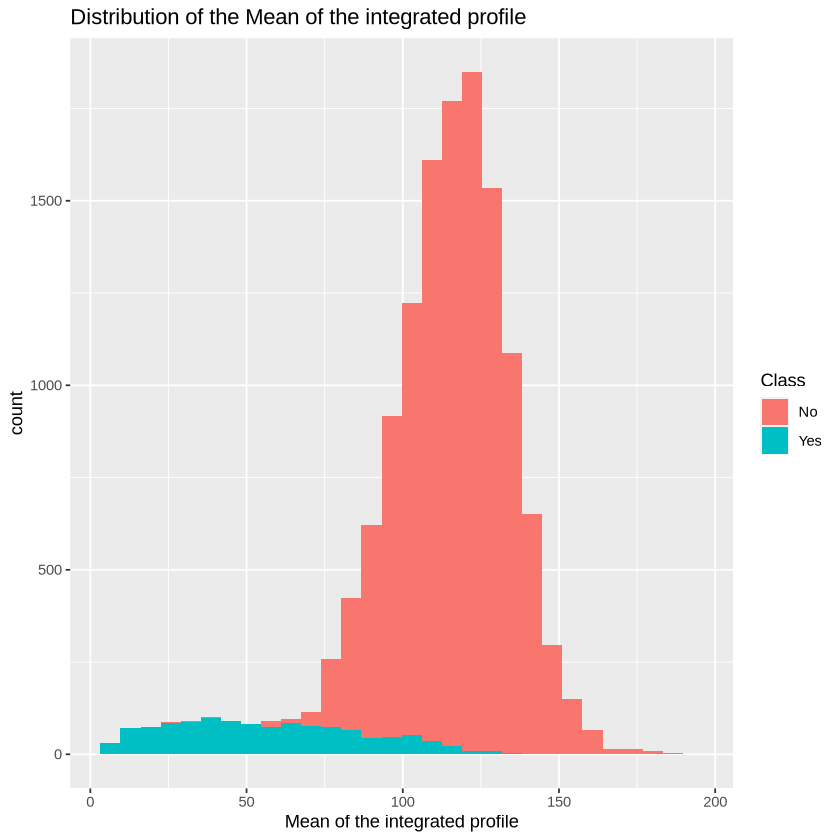

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


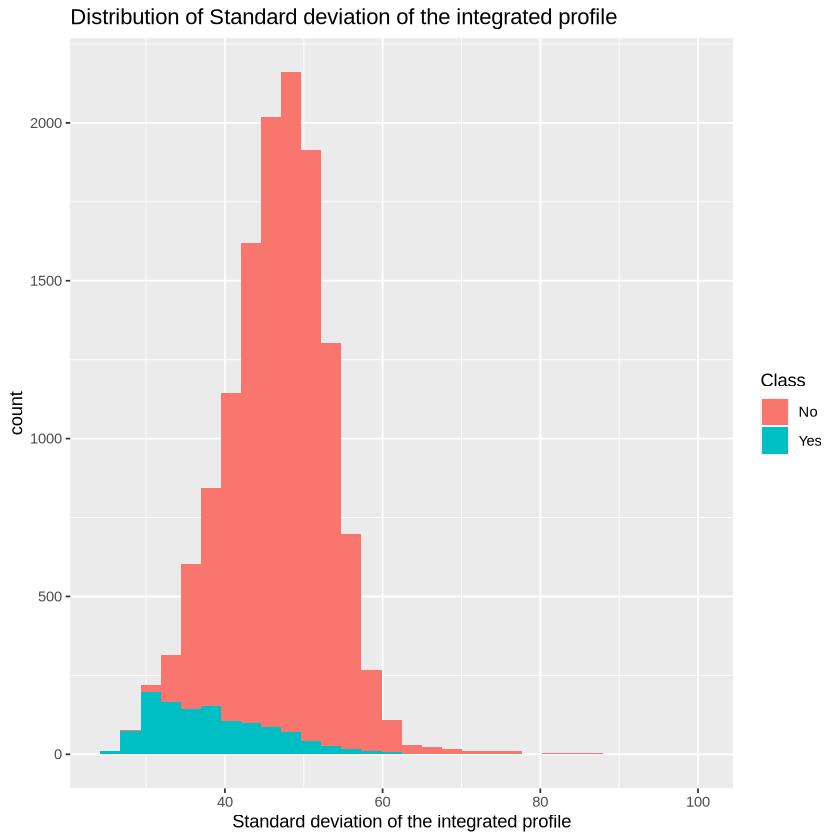

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


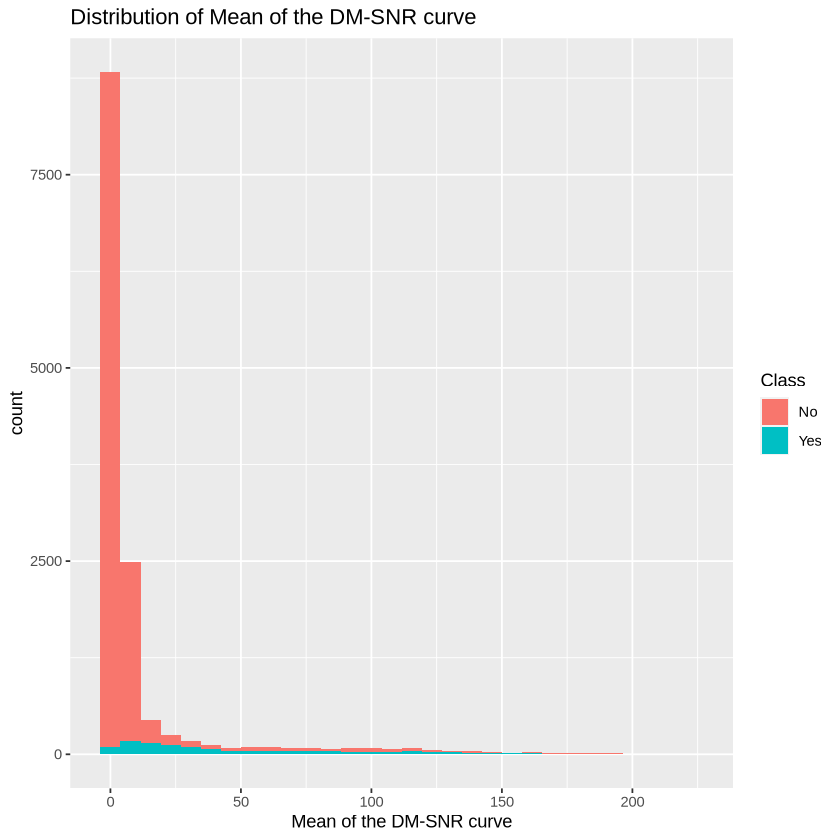

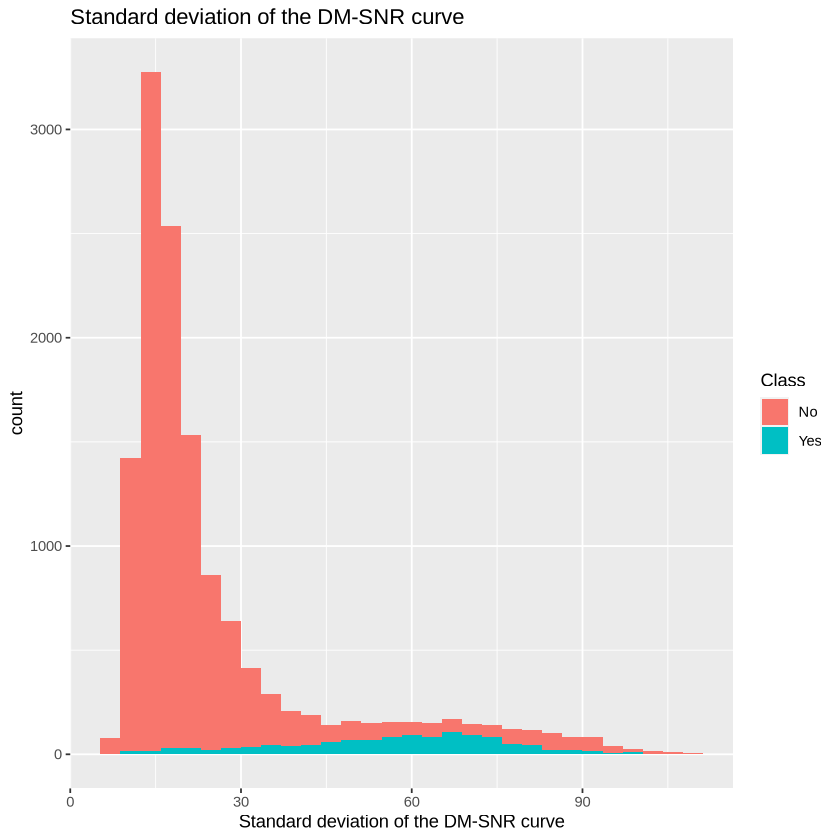

In [8]:
histo_1 <- pulsar_train |> ggplot(aes(x = Mean_integrated, fill = Class)) +
        geom_histogram() +
        labs(x = "Mean of the integrated profile", y = "count") + 
        ggtitle("Distribution of the Mean of the integrated profile")

histo_2 <- pulsar_train |> ggplot(aes(x = Std_integrated, fill = Class)) +
        geom_histogram() +
        labs(x = "Standard deviation of the integrated profile", y = "count") +
        ggtitle("Distribution of Standard deviation of the integrated profile")

histo_3 <- pulsar_train |> ggplot(aes(x = Mean_curve, fill = Class)) +
        geom_histogram() +
        labs(x = "Mean of the DM-SNR curve", y = "count") +
        ggtitle("Distribution of Mean of the DM-SNR curve")

histo_4 <- pulsar_train |> ggplot(aes(x = Std_curve, fill = Class)) +
        geom_histogram() +
        labs(x = "Standard deviation of the DM-SNR curve", y = "count") +
        ggtitle("Standard deviation of the DM-SNR curve")

histo_1 
histo_2
histo_3
histo_4